In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv("https://www.statlearning.com/s/Advertising.csv", index_col=0)

In [ ]:
df.columns = df.columns.str.strip().str.lower()


In [ ]:
X = df[['tv', 'radio', 'newspaper']]
y = df['sales']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

In [ ]:
def eval_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mae, mse, rmse
models = ['Linear', 'Polynomial', 'SVR']
results = [eval_model(y_test, y_pred_lr),
           eval_model(y_test, y_pred_poly),
           eval_model(y_test, y_pred_svr)]



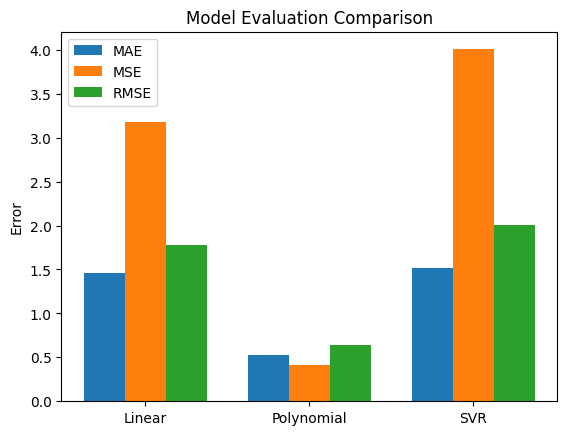

In [ ]:

mae_vals, mse_vals, rmse_vals = zip(*results)
x = np.arange(len(models))
width = 0.25

plt.bar(x - width, mae_vals, width, label='MAE')
plt.bar(x, mse_vals, width, label='MSE')
plt.bar(x + width, rmse_vals, width, label='RMSE')
plt.xticks(x, models)
plt.ylabel("Error")
plt.title("Model Evaluation Comparison")
plt.legend()
plt.show()

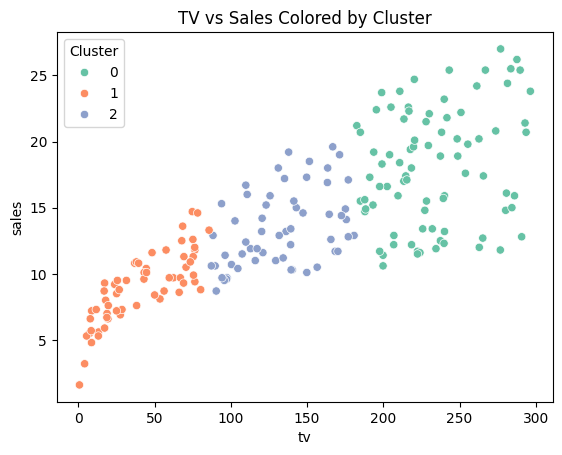

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)
sns.scatterplot(data=df, x='tv', y='sales', hue='Cluster', palette='Set2')
plt.title("TV vs Sales Colored by Cluster")
plt.show()